#HIDS-506 Final Project: 

## Packages



We will start by loading some of the packages that will help us 
organize and visualize the data. Other packages will be loaded as necessary.

In [1]:
#Import packages
from collections import Counter
import pandas as pd
import numpy as np
import collections, numpy
import mlxtend
import matplotlib 
from matplotlib import pyplot 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
matplotlib.rcParams['figure.figsize'] = (10, 10)


from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc

## Dataset

**Research Question:** Can machine learning (ML) provide a data-driven alternative to current emergency care triage and produce an accurate patient acuity score based on minimal patient information upon admission to the Emergency Department (ED), thus reducing human-biased medical decisions and preserving clinician time, attention, and ED workflow? 

Note: This model uses the train and test splits from TrainingModel_Part1 where patient acuity scores were resampled to reflect a more balanced data set. 



Exploring the datasets:

In [2]:
#from google.colab import 
#drivedrive.mount('/content/drive')

In [3]:
#mounting google drive to access files 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Triage_clean_df

In [4]:
# reading in train and test split csv files 
X_train = pd.read_csv('/content/drive/MyDrive/HIDS_506_FinalProject/data/X_train_resampled.csv')
X_test = pd.read_csv('/content/drive/MyDrive/HIDS_506_FinalProject/data/X_test_resampled.csv')
y_train = pd.read_csv('/content/drive/MyDrive/HIDS_506_FinalProject/data/y_train_resampled.csv')
y_test = pd.read_csv('/content/drive/MyDrive/HIDS_506_FinalProject/data/y_test_resampled.csv')

The following feature importance code chunks are commented out due to storage constraints. To run feature importance, simply uncomment these sections. 

In [5]:
#from sklearn.ensemble import RandomForestClassifier
#import numpy as np

# X is your input feature matrix with shape (n_samples, n_features)
# y is your target variable matrix with shape (n_samples, n_classes)
# where each column corresponds to a binary label for a class

# Train a random forest classifier on your data
#model = RandomForestClassifier(n_estimators=100) #, random_state=42)
#model.fit(X_train, y_train)

# Get feature importances from the random forest classifier
#importances = model.feature_importances_

# Print feature importances
#for i, importance in enumerate(importances):
    #print(f"Feature {i}: {importance}")


In [6]:
# xgboost import
#import xgboost as xgb
#from xgboost import XGBClassifier
#from xgboost import plot_importance

In [7]:
# fit model no training data
# Replace invalid characters in feature names
#new_feature_names = [name.replace('[', '_').replace(']', '_').replace('<', '_') for name in X_train.columns]

# Create a new dataframe with renamed columns
#X_train_renamed = X_train.rename(columns=dict(zip(X_train.columns, new_feature_names)))

# Train the XGBClassifier model with the renamed feature names
#model = XGBClassifier()
#model.fit(X_train_renamed, y_train)

In [8]:
# plot feature importance
#fig, ax = plt.subplots(figsize=(100, 100))
#plot_importance(model, ax=ax)
#plt.show()
#plt.savefig("feature_importance_resampled.pdf", bbox_inches='tight')
# intial vital signs, gender, age, race, and cheif complaint of experiencing chets pain show the highest feature importance when fitting the model

In [9]:
def get_predictions(predictions_proba, threshold=0.5):
  predictions = np.where(predictions_proba <= threshold, 0, 1)
  return predictions

#Function that calculates and print metrics
def show_metrics(testy, predictions):
  print('====================')
  accuracy = accuracy_score(testy, predictions)
  print('Accuracy: %.3f' % accuracy)
  recall = recall_score(testy, predictions)
  print('Recall: %.3f' % recall)
  precision = precision_score(testy, predictions)
  print('Precision: %.3f' % precision)
  f1 = f1_score(testy, predictions)
  print('F1: %.3f' % f1)
  print('====================')

#Function to plot ROC Curve
def plot_roc(testy, predictions, title):
    fpr, tpr, thresholds = roc_curve(testy, predictions)
    roc_auc = auc(fpr, tpr)  
    print('AUROC: %.3f' % roc_auc)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

#Function to plot PR Curve
def plot_prc(testy, predictions, title):
    precision, recall, thresholds = precision_recall_curve(testy, predictions)
    auc_score = auc(recall, precision)    
    plt.plot(recall,precision, label='PR curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--' )
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0, 1.02])
    plt.ylim([0, 1.02])    
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

#Function to plot precision and recall vs all tresholds
def plot_prec_recall_vs_thresh(testy, predictions, title):
    precision, recall, thresholds = precision_recall_curve(testy, predictions)
    plt.plot(thresholds, precision[:-1], 'b--', label='precision')
    plt.plot(thresholds, recall[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')    
    plt.ylim([0,1])
    plt.legend(loc="lower right")
    plt.title(title)
    plt.show()

In [10]:
# Scaler defined to fit train data for modeling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [11]:
# Now apply the transformations to the data:

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# import keras for neural network testing
import keras
import tensorflow as tf
import datetime, os
from keras.callbacks import TensorBoard

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

In [14]:
#(47392 observations, 4497 features)
X_train.shape

(47392, 4497)

In [15]:
# Defining model Neural Network architecture 
model = Sequential()
# Dense(64) is a fully-connected layer with 64 units
# specify input shape 
model.add(Dense(64, activation='relu', input_shape=(4497,)))
# dropout layer 0.5
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
# softmax activation function layer for multi-class classification 
model.add(Dense(5, activation='softmax'))

sgd = SGD(lr=0.01, nesterov=True) #decay=1e-6, momentum=0.9, 

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [16]:
# model complilation
model.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

In [17]:
# model architecture summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                287872    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 325       
                                                                 
Total params: 292,357
Trainable params: 292,357
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fitting model on 220 epochs and batch size of 140
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_train, y_train), batch_size=140)

Epoch 1/200
339/339 [==============================] - 7s 17ms/step - loss: 1.8149 - accuracy: 0.2828 - val_loss: 1.4703 - val_accuracy: 0.4478
Epoch 2/200
339/339 [==============================] - 3s 10ms/step - loss: 1.5571 - accuracy: 0.3698 - val_loss: 1.3712 - val_accuracy: 0.5310
Epoch 3/200
339/339 [==============================] - 3s 10ms/step - loss: 1.4391 - accuracy: 0.4290 - val_loss: 1.2458 - val_accuracy: 0.5805
Epoch 4/200
339/339 [==============================] - 4s 11ms/step - loss: 1.3290 - accuracy: 0.4677 - val_loss: 1.1262 - val_accuracy: 0.6053
Epoch 5/200
339/339 [==============================] - 3s 10ms/step - loss: 1.2390 - accuracy: 0.5018 - val_loss: 1.0369 - val_accuracy: 0.6189
Epoch 6/200
339/339 [==============================] - 3s 10ms/step - loss: 1.1704 - accuracy: 0.5236 - val_loss: 0.9752 - val_accuracy: 0.6320
Epoch 7/200
339/339 [==============================] - 4s 11ms/step - loss: 1.1213 - accuracy: 0.5424 - val_loss: 0.9304 - val_accuracy:

In [ ]:
# loss and accuracy evaluation score
score = model.evaluate(X_test, y_test, batch_size=140)

85/85 [==============================] - 0s 4ms/step - loss: 0.8509 - accuracy: 0.7262


In [ ]:
# metric names
model.metrics_names

['loss', 'accuracy']

In [ ]:
# computed loss and accuracy 
score

[0.85085529088974, 0.7262216210365295]

In [ ]:
# plot of validation and training accuracy and loss
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

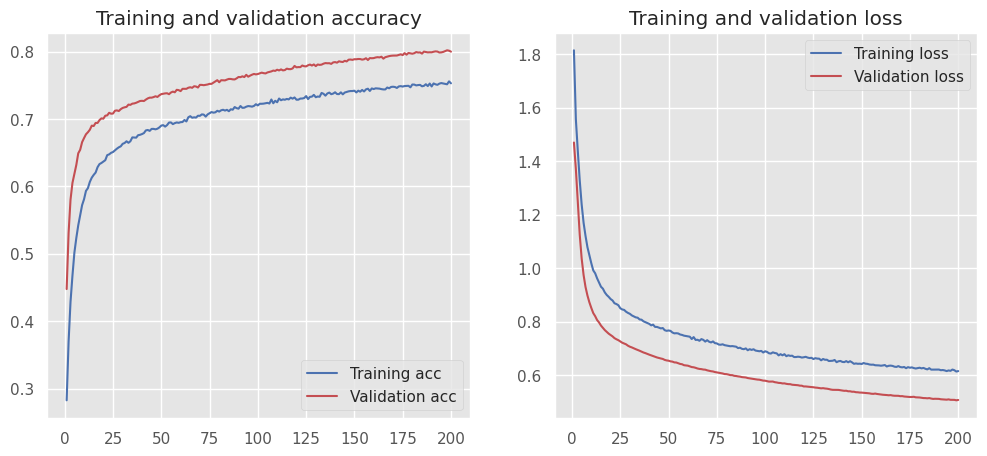

In [ ]:
# plot produced below of training and validation loss and accuracy
plot_history(history)
plt.savefig('plot_part4.pdf')

In [ ]:
# model predictions on training data 
model.predict(X_train, batch_size=None, verbose=0, steps=None)

array([[2.7042984e-12, 1.5506962e-11, 1.2647143e-06, 7.3526008e-03,
        9.9264610e-01],
       [4.0173694e-01, 3.7292364e-01, 2.2533853e-01, 9.0313938e-07,
        4.6487508e-20],
       [2.5537643e-03, 6.3965423e-03, 2.0150387e-01, 7.7703094e-01,
        1.2514891e-02],
       ...,
       [8.4584755e-01, 1.4361180e-01, 1.0505240e-02, 3.5310644e-05,
        4.3868762e-09],
       [2.2832604e-04, 3.4538698e-01, 6.5356743e-01, 8.1720744e-04,
        1.7878779e-17],
       [4.3338980e-03, 6.6204411e-03, 3.3527907e-02, 7.3782086e-02,
        8.8173562e-01]], dtype=float32)

In [ ]:
# class 4 has the highest probablity for the first sample of X_train
np.argmax(model.predict(X_train)[0])

1481/1481 [==============================] - 5s 3ms/step


4

In [ ]:
%load_ext tensorboard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
%tensorboard --logdir logs

In [ ]:
# Predicting the Test set results
y_pred_prob = model.predict(X_test)

371/371 [==============================] - 1s 2ms/step


In [ ]:
# first 5 predictions 
y_pred_prob[:5]

array([[2.3281060e-01, 6.3919538e-01, 1.2799400e-01, 7.3083508e-09,
        4.2936320e-23],
       [1.4005353e-04, 1.1675124e-03, 1.6169125e-01, 8.3699763e-01,
        3.6122292e-06],
       [1.0593190e-05, 3.6212910e-05, 2.2221124e-02, 3.5908270e-01,
        6.1864930e-01],
       [4.1865688e-03, 2.5207712e-03, 8.3405197e-02, 9.0902770e-01,
        8.5979153e-04],
       [1.4833869e-01, 5.0921357e-01, 3.4159151e-01, 8.5627189e-04,
        4.3298043e-10]], dtype=float32)

In [ ]:
# y_pred predictions when model is fitted using test data 
y_pred = (model.predict(X_test) > 0.5).astype("int32")

371/371 [==============================] - 1s 2ms/step


In [ ]:
y_pred[:5]

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0]], dtype=int32)

In [ ]:
# import for multi-class classification confusion and classification report
from sklearn.metrics import multilabel_confusion_matrix, classification_report
matrix = multilabel_confusion_matrix(y_pred, y_test)

<ipython-input-33-f45cb6c3d8cd>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 2, i+1)


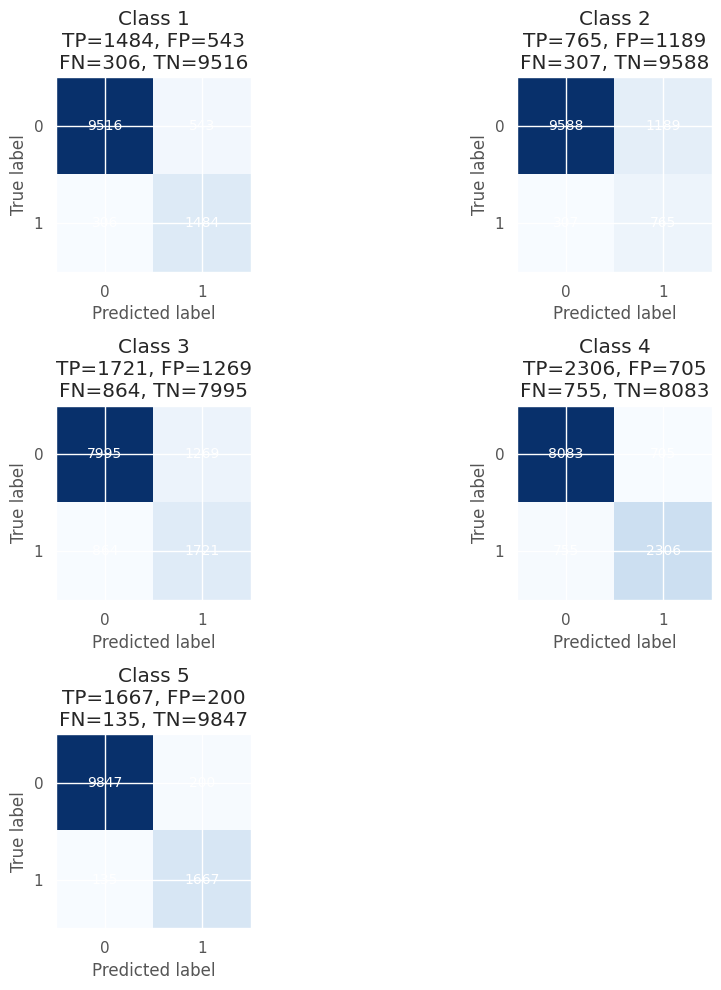

<Figure size 1000x1000 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

for i in range(len(matrix)):
    tn, fp, fn, tp = matrix[i].ravel()
    ax = plt.subplot(3, 2, i+1)
    ax.imshow(matrix[i], cmap='Blues')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(f'Class {i+1}\nTP={tp}, FP={fp}\nFN={fn}, TN={tn}')
    for j in range(2):
        for k in range(2):
            ax.text(k, j, matrix[i][j][k], ha='center', va='center', color='white')

plt.tight_layout()
plt.show()
plt.savefig('confusion_matrix_resampled.pdf')

In [ ]:
# classification report output
print(classification_report(
    y_test,
    y_pred,
    output_dict=False,
    target_names=['1', '2', '3', '4', '5']
))

              precision    recall  f1-score   support

           1       0.83      0.73      0.78      2027
           2       0.71      0.39      0.51      1954
           3       0.67      0.58      0.62      2990
           4       0.75      0.77      0.76      3011
           5       0.93      0.89      0.91      1867

   micro avg       0.77      0.67      0.72     11849
   macro avg       0.78      0.67      0.71     11849
weighted avg       0.76      0.67      0.71     11849
 samples avg       0.67      0.67      0.67     11849



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# # Your code here; save the model for future reference 
model.save('resampled2_model.h5')